<a href="https://colab.research.google.com/github/terence-mitterrand/terence-mitterrand-DataScience-GenAI-Submissions/blob/main/Exploratory_Data_Analysis/Full_EDA_Practice_COMPLETED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

file_path = '/content/titanic.csv'

try:
    df_titanic = pd.read_csv(file_path)
    print(f"DataFrame successfully created from '{file_path}'.")
    display(df_titanic.head(10))
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it is uploaded and the path is correct.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

DataFrame successfully created from '/content/titanic.csv'.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
print(df_titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df_titanic_cleaned = df_titanic.drop(columns=['Cabin', 'Age'])
print("DataFrame after dropping 'Cabin' and 'Age' columns:")
display(df_titanic_cleaned.head())

DataFrame after dropping 'Cabin' and 'Age' columns:


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with L2 (Ridge) regularization
# C is the inverse of regularization strength; smaller values specify stronger regularization.
# solver='liblinear' is a good choice for smaller datasets and supports L2 penalty.
model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

print("Logistic Regression model with L2 regularization created successfully.")
print(model)

Logistic Regression model with L2 regularization created successfully.
LogisticRegression(random_state=42, solver='liblinear')


In [ ]:
num_duplicate_rows = df_titanic_cleaned.duplicated().sum()
num_unique_rows = len(df_titanic_cleaned) - num_duplicate_rows

print(f"Number of duplicate rows: {num_duplicate_rows}")
print(f"Number of unique rows: {num_unique_rows}")

Number of duplicate rows: 0
Number of unique rows: 891


In [ ]:
df_titanic_cleaned = df_titanic_cleaned.dropna(subset=['Embarked'])
print("DataFrame after dropping rows with missing 'Embarked' values:")
print(df_titanic_cleaned.shape)
display(df_titanic_cleaned.head())

DataFrame after dropping rows with missing 'Embarked' values:
(889, 10)


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [ ]:
numerical_cols = df_titanic_cleaned.select_dtypes(include=['number']).columns

# Prepare a dictionary to store all statistics
stats = {}

for col in numerical_cols:
    col_stats = {
        'min': df_titanic_cleaned[col].min(),
        'Q1': df_titanic_cleaned[col].quantile(0.25),
        'median': df_titanic_cleaned[col].median(),
        'mode': df_titanic_cleaned[col].mode().tolist(), # mode can have multiple values
        'mean': df_titanic_cleaned[col].mean(),
        'Q3': df_titanic_cleaned[col].quantile(0.75),
        'max': df_titanic_cleaned[col].max(),
        'IQR': df_titanic_cleaned[col].quantile(0.75) - df_titanic_cleaned[col].quantile(0.25),
        'variance': df_titanic_cleaned[col].var(),
        'std': df_titanic_cleaned[col].std()
    }
    stats[col] = col_stats

# Convert to DataFrame for better display
stats_df = pd.DataFrame(stats).T

# Reorder columns as requested
ordered_cols = ['min', 'Q1', 'median', 'mode', 'mean', 'Q3', 'max', 'IQR', 'variance', 'std']
stats_df = stats_df[ordered_cols]

print("Descriptive Statistics for Numerical Columns:")
display(stats_df)

Descriptive Statistics for Numerical Columns:


,min,Q1,median,mode,mean,Q3,max,IQR,variance,std
PassengerId,1,224.0,446.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",446.0,668.0,891,444.0,66048.060811,256.998173
Survived,0,0.0,0.0,[0],0.382452,1.0,1,1.0,0.236448,0.48626
Pclass,1,2.0,3.0,[3],2.311586,3.0,3,1.0,0.696724,0.8347
SibSp,0,0.0,0.0,[0],0.524184,1.0,8,1.0,1.218164,1.103705
Parch,0,0.0,0.0,[0],0.382452,0.0,6,0.0,0.650863,0.806761
Fare,0.0,7.8958,14.4542,[8.05],32.096681,31.0,512.3292,23.1042,2469.841935,49.697504


In [ ]:
import pandas as pd

# --- Re-load and Clean DataFrame ---
file_path = '/content/titanic.csv'

df_titanic = None # Initialize df_titanic
try:
    df_titanic = pd.read_csv(file_path)
    print(f"DataFrame successfully created from '{file_path}'.")

    # Drop 'Cabin' and 'Age' columns
    df_titanic_cleaned = df_titanic.drop(columns=['Cabin', 'Age'])
    print("DataFrame after dropping 'Cabin' and 'Age' columns.")

    # Drop rows with missing 'Embarked' values
    df_titanic_cleaned = df_titanic_cleaned.dropna(subset=['Embarked'])
    print("DataFrame after dropping rows with missing 'Embarked' values.")
    print(f"Cleaned DataFrame shape: {df_titanic_cleaned.shape}")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it is uploaded to '/content/' and the path is correct.")
    print("Please upload 'titanic.csv' to your Colab environment to proceed.")
    df_titanic_cleaned = None # Ensure df_titanic_cleaned is not defined if file not found
except Exception as e:
    print(f"An error occurred while reading the CSV file or during cleaning: {e}")
    df_titanic_cleaned = None


# --- Calculate Descriptive Statistics for remaining numerical columns ---
if df_titanic_cleaned is not None:
    numerical_cols = df_titanic_cleaned.select_dtypes(include=['number']).columns

    stats = {}
    for col in numerical_cols:
        col_stats = {
            'min': df_titanic_cleaned[col].min(),
            'Q1': df_titanic_cleaned[col].quantile(0.25),
            'median': df_titanic_cleaned[col].median(),
            'mode': df_titanic_cleaned[col].mode().tolist(),
            'mean': df_titanic_cleaned[col].mean(),
            'Q3': df_titanic_cleaned[col].quantile(0.75),
            'max': df_titanic_cleaned[col].max(),
            'IQR': df_titanic_cleaned[col].quantile(0.75) - df_titanic_cleaned[col].quantile(0.25),
            'variance': df_titanic_cleaned[col].var(),
            'std': df_titanic_cleaned[col].std()
        }
        stats[col] = col_stats

    stats_df = pd.DataFrame(stats).T

    ordered_cols = ['min', 'Q1', 'median', 'mode', 'mean', 'Q3', 'max', 'IQR', 'variance', 'std']
    stats_df = stats_df[ordered_cols]

    # --- Remove specified rows and display ---
    rows_to_remove = ['PassengerId', 'SibSp', 'Parch']
    filtered_stats_df = stats_df.drop(rows_to_remove, errors='ignore')

    print("Descriptive Statistics for selected numerical columns (excluding PassengerId, SibSp, Parch):")
    display(filtered_stats_df)
else:
    print("Cannot calculate descriptive statistics as df_titanic_cleaned was not created.")

DataFrame successfully created from '/content/titanic.csv'.
DataFrame after dropping 'Cabin' and 'Age' columns.
DataFrame after dropping rows with missing 'Embarked' values.
Cleaned DataFrame shape: (889, 10)
Descriptive Statistics for selected numerical columns (excluding PassengerId, SibSp, Parch):


,min,Q1,median,mode,mean,Q3,max,IQR,variance,std
Survived,0,0.0,0.0,[0],0.382452,1.0,1,1.0,0.236448,0.48626
Pclass,1,2.0,3.0,[3],2.311586,3.0,3,1.0,0.696724,0.8347
Fare,0.0,7.8958,14.4542,[8.05],32.096681,31.0,512.3292,23.1042,2469.841935,49.697504


/tmp/ipython-input-510877817.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=survival_rate_by_pclass, palette='viridis')


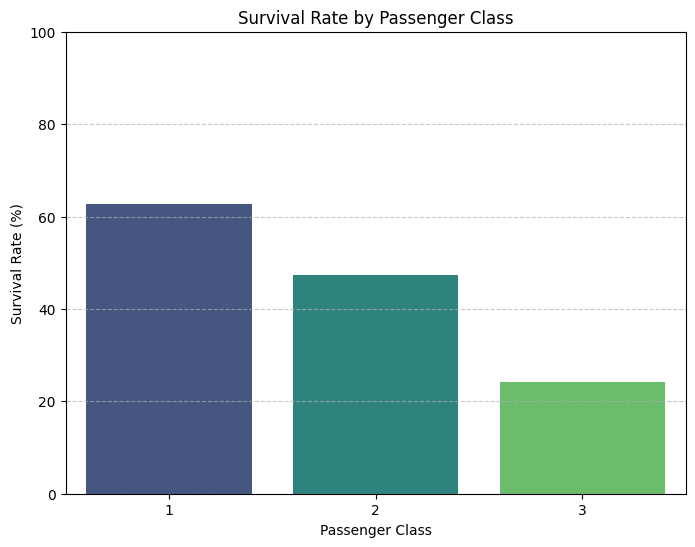

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate survival rate by passenger class
survival_rate_by_pclass = df_titanic_cleaned.groupby('Pclass')['Survived'].mean().reset_index()
survival_rate_by_pclass['Survived'] = survival_rate_by_pclass['Survived'] * 100 # Convert to percentage

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=survival_rate_by_pclass, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

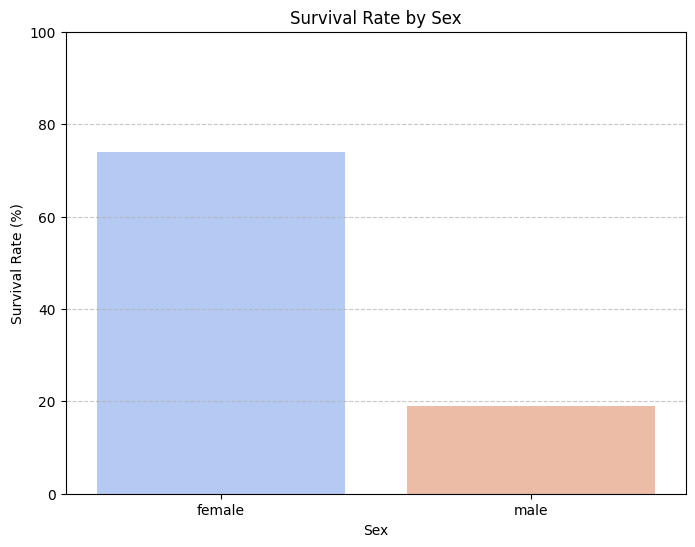

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate survival rate by sex
survival_rate_by_sex = df_titanic_cleaned.groupby('Sex')['Survived'].mean().reset_index()
survival_rate_by_sex['Survived'] = survival_rate_by_sex['Survived'] * 100 # Convert to percentage

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=survival_rate_by_sex, palette='coolwarm', hue='Sex', legend=False)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

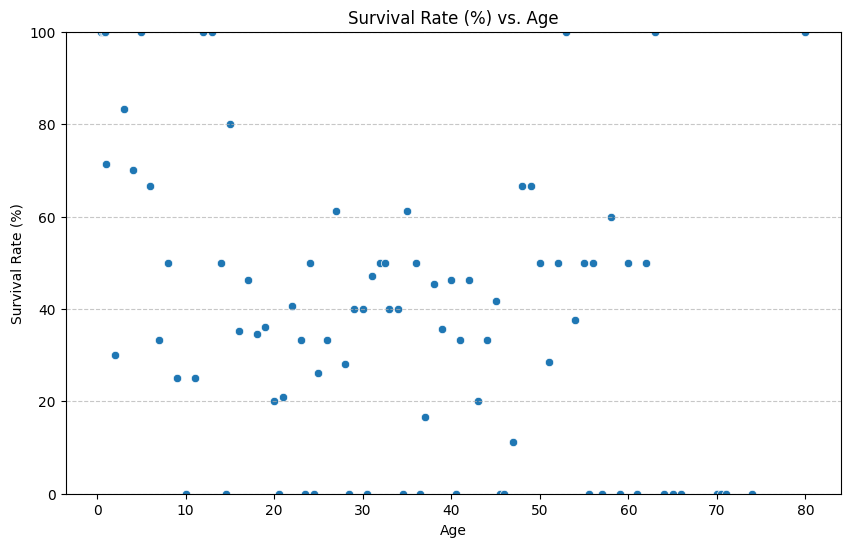

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_titanic is available. If not, reload it.
# (It should be available from previous steps, but this ensures robustness)
if 'df_titanic' not in locals() and 'df_titanic' not in globals():
    try:
        df_titanic = pd.read_csv('/content/titanic.csv')
        print("df_titanic reloaded for Age analysis.")
    except Exception as e:
        print(f"Error reloading df_titanic: {e}")
        print("Cannot proceed with Age analysis without df_titanic. Please ensure 'titanic.csv' is uploaded.")
        # Exit if df_titanic cannot be loaded
        exit()

# Calculate survival rate by Age
# Drop rows where 'Age' is NaN before grouping to avoid issues with aggregation
survival_rate_by_age = df_titanic.dropna(subset=['Age']).groupby('Age')['Survived'].mean().reset_index()
survival_rate_by_age['Survived'] = survival_rate_by_age['Survived'] * 100 # Convert to percentage

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Survived', data=survival_rate_by_age)
plt.title('Survival Rate (%) vs. Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

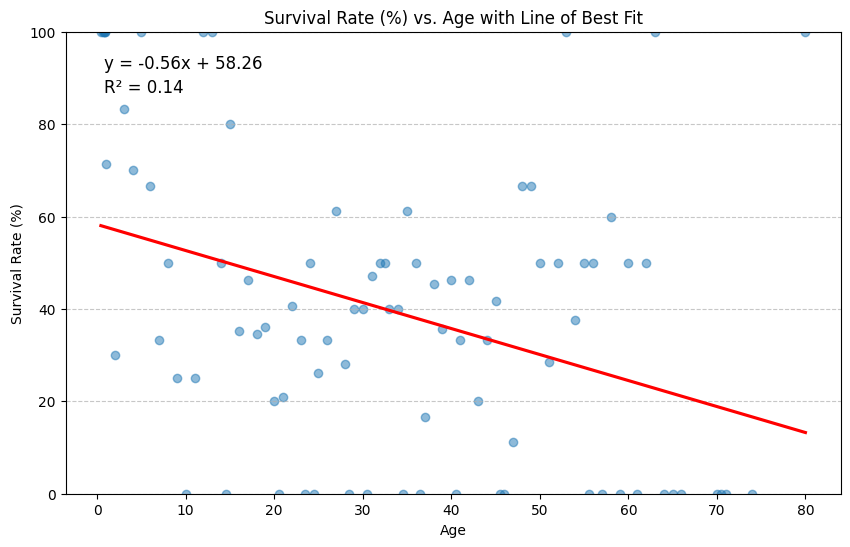

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Ensure df_titanic is available. If not, reload it.
if 'df_titanic' not in locals() and 'df_titanic' not in globals():
    try:
        df_titanic = pd.read_csv('/content/titanic.csv')
        print("df_titanic reloaded for Age analysis.")
    except Exception as e:
        print(f"Error reloading df_titanic: {e}")
        print("Cannot proceed with Age analysis without df_titanic. Please ensure 'titanic.csv' is uploaded.")
        exit()

# Calculate survival rate by Age, dropping rows with missing Age
survival_rate_by_age = df_titanic.dropna(subset=['Age']).groupby('Age')['Survived'].mean().reset_index()
survival_rate_by_age['Survived'] = survival_rate_by_age['Survived'] * 100 # Convert to percentage

# Perform linear regression to get the equation of the line and R-squared
# Using the aggregated survival_rate_by_age for the regression
slope, intercept, r_value, p_value, std_err = linregress(survival_rate_by_age['Age'], survival_rate_by_age['Survived'])
r_squared = r_value**2

# Create the scatter plot with a line of best fit, without the confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Survived', data=survival_rate_by_age, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ci=None)
plt.title('Survival Rate (%) vs. Age with Line of Best Fit')
plt.xlabel('Age')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the equation of the line and R-squared to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared_text = f'R² = {r_squared:.2f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, r_squared_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

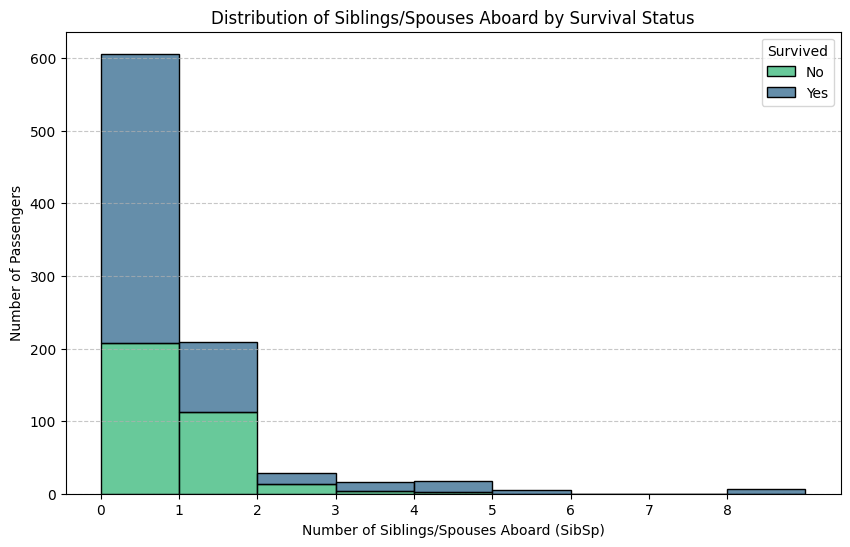

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of 'SibSp' comparing survivors vs. non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=df_titanic_cleaned, x='SibSp', hue='Survived', multiple='stack', bins=range(df_titanic_cleaned['SibSp'].max() + 2), palette='viridis')
plt.title('Distribution of Siblings/Spouses Aboard by Survival Status')
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=range(df_titanic_cleaned['SibSp'].max() + 1)) # Ensure integer ticks for SibSp
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

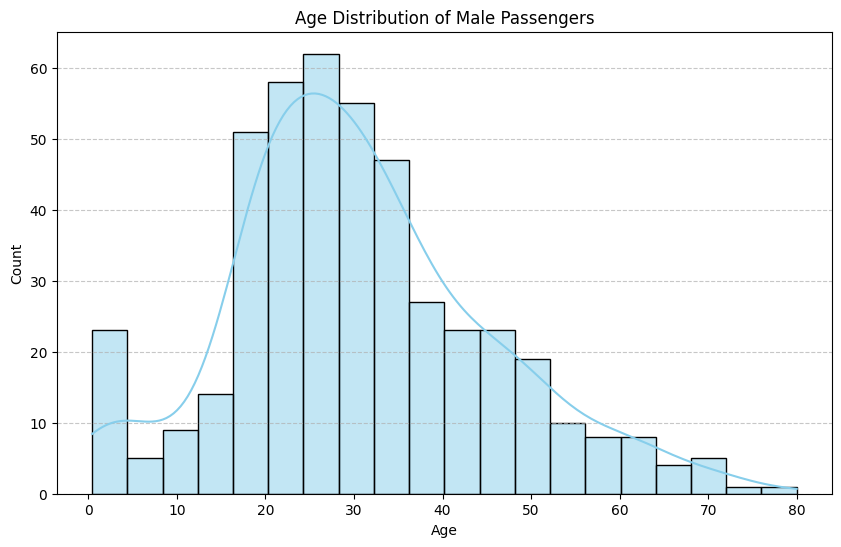

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_titanic is available. If not, reload it.
if 'df_titanic' not in locals() and 'df_titanic' not in globals():
    try:
        df_titanic = pd.read_csv('/content/titanic.csv')
        print("df_titanic reloaded for Age analysis.")
    except Exception as e:
        print(f"Error reloading df_titanic: {e}")
        print("Cannot proceed with Age analysis without df_titanic. Please ensure 'titanic.csv' is uploaded.")
        exit()

# Filter the DataFrame for male passengers and drop NaN Age values for the histogram
males_df = df_titanic[df_titanic['Sex'] == 'male'].dropna(subset=['Age'])

# Create the histogram for age distribution of males
plt.figure(figsize=(10, 6))
sns.histplot(data=males_df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Male Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

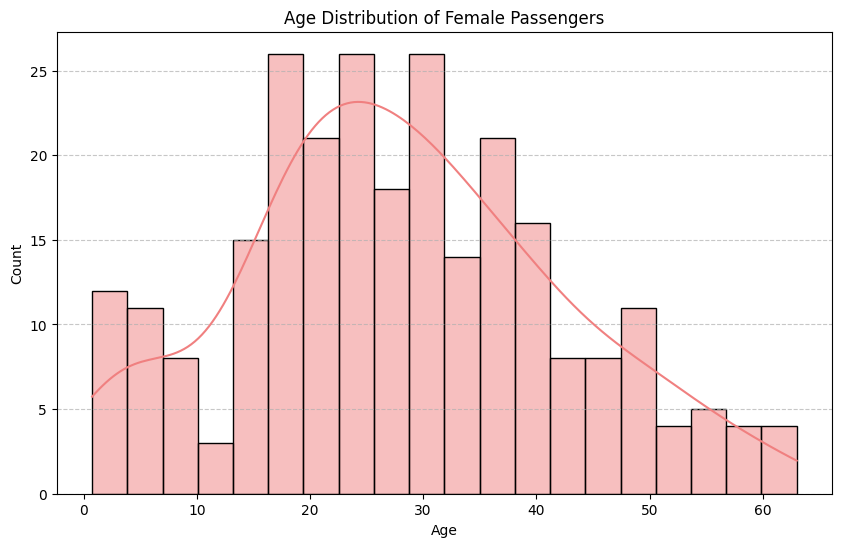

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_titanic is available. If not, reload it.
if 'df_titanic' not in locals() and 'df_titanic' not in globals():
    try:
        df_titanic = pd.read_csv('/content/titanic.csv')
        print("df_titanic reloaded for Age analysis.")
    except Exception as e:
        print(f"Error reloading df_titanic: {e}")
        print("Cannot proceed with Age analysis without df_titanic. Please ensure 'titanic.csv' is uploaded.")
        exit()

# Filter the DataFrame for female passengers and drop NaN Age values for the histogram
females_df = df_titanic[df_titanic['Sex'] == 'female'].dropna(subset=['Age'])

# Create the histogram for age distribution of females
plt.figure(figsize=(10, 6))
sns.histplot(data=females_df, x='Age', bins=20, kde=True, color='lightcoral')
plt.title('Age Distribution of Female Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

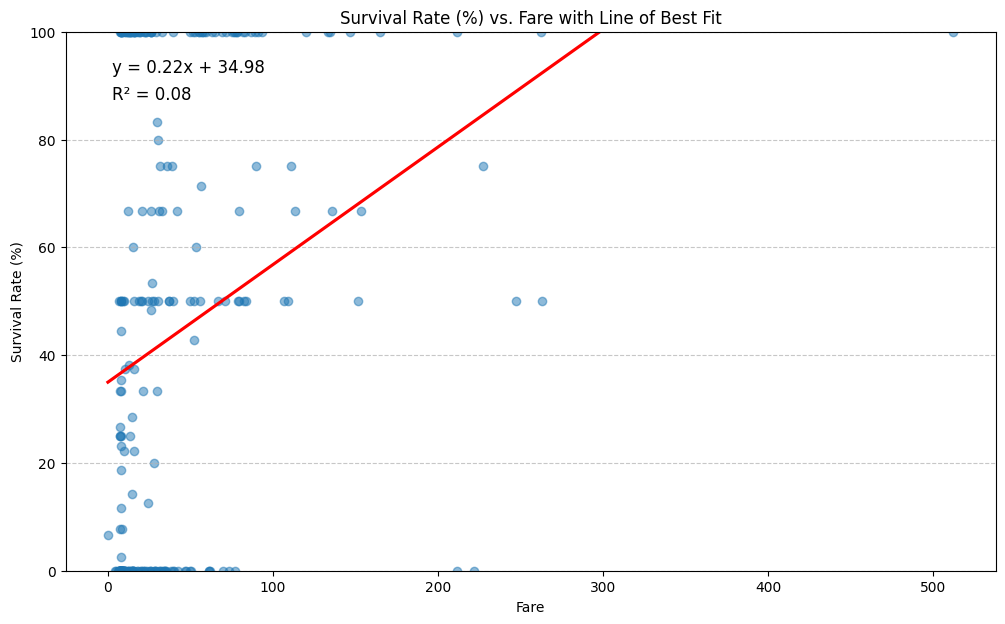

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Calculate survival rate by Fare
survival_rate_by_fare = df_titanic_cleaned.groupby('Fare')['Survived'].mean().reset_index()
survival_rate_by_fare['Survived'] = survival_rate_by_fare['Survived'] * 100 # Convert to percentage

# Perform linear regression to get the equation of the line and R-squared
slope, intercept, r_value, p_value, std_err = linregress(survival_rate_by_fare['Fare'], survival_rate_by_fare['Survived'])
r_squared = r_value**2

# Create the scatter plot with a line of best fit, without the confidence interval
plt.figure(figsize=(12, 7))
sns.regplot(x='Fare', y='Survived', data=survival_rate_by_fare, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ci=None)
plt.title('Survival Rate (%) vs. Fare with Line of Best Fit')
plt.xlabel('Fare')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the equation of the line and R-squared to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared_text = f'R² = {r_squared:.2f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, r_squared_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

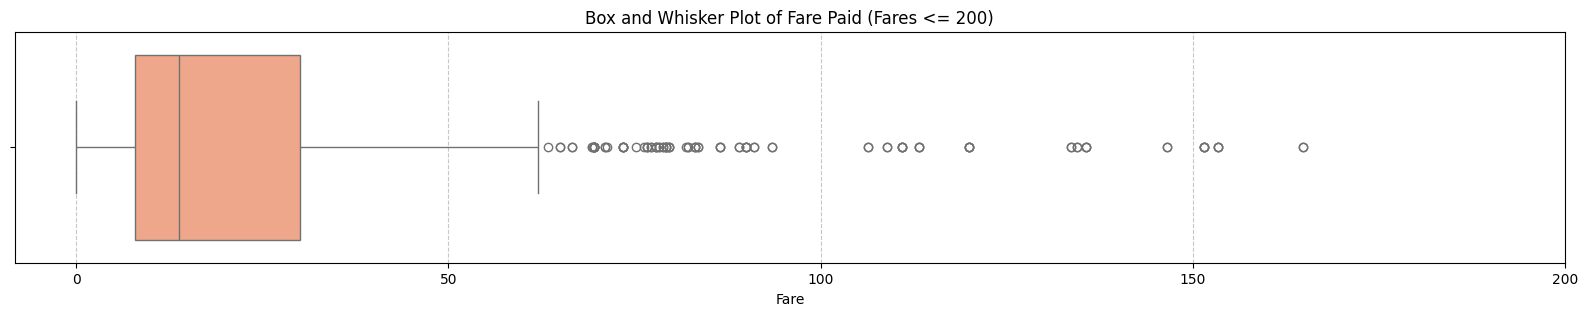

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out fares over 200
filtered_fare = df_titanic_cleaned[df_titanic_cleaned['Fare'] <= 200]['Fare']

# Create a box plot for the filtered 'Fare' column
plt.figure(figsize=(20, 3)) # Long and less tall format
sns.boxplot(x=filtered_fare, color='lightsalmon') # Horizontal plot
plt.title('Box and Whisker Plot of Fare Paid (Fares <= 200)')
plt.xlabel('Fare')

# Set x-axis intervals to 50, adjusted for the new max fare
max_filtered_fare = filtered_fare.max()
plt.xticks(range(0, int(max_filtered_fare) + 51, 50))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

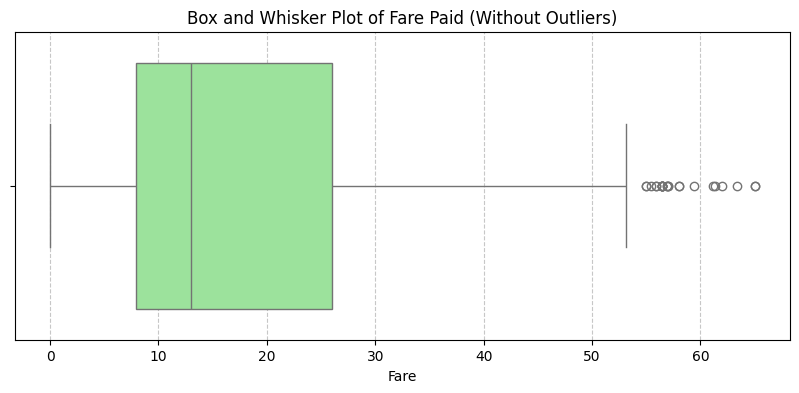

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate Q1, Q3, and IQR for 'Fare'
Q1 = df_titanic_cleaned['Fare'].quantile(0.25)
Q3 = df_titanic_cleaned['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
fare_no_outliers = df_titanic_cleaned[(df_titanic_cleaned['Fare'] >= lower_bound) & (df_titanic_cleaned['Fare'] <= upper_bound)]['Fare']

# Create a horizontal box plot for the 'Fare' column without outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=fare_no_outliers, color='lightgreen') # Assign to x for horizontal plot
plt.title('Box and Whisker Plot of Fare Paid (Without Outliers)')
plt.xlabel('Fare')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

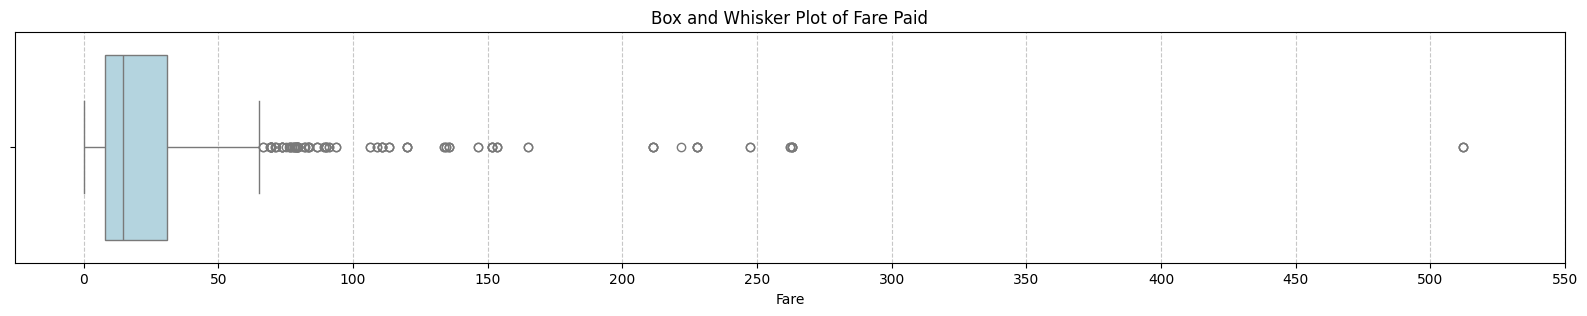

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the 'Fare' column
plt.figure(figsize=(20, 3)) # Made even longer
sns.boxplot(x=df_titanic_cleaned['Fare'], color='lightblue') # Changed to x for horizontal plot
plt.title('Box and Whisker Plot of Fare Paid')
plt.xlabel('Fare') # Changed label for horizontal plot

# Set x-axis intervals to 50
max_fare = df_titanic_cleaned['Fare'].max()
plt.xticks(range(0, int(max_fare) + 51, 50))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

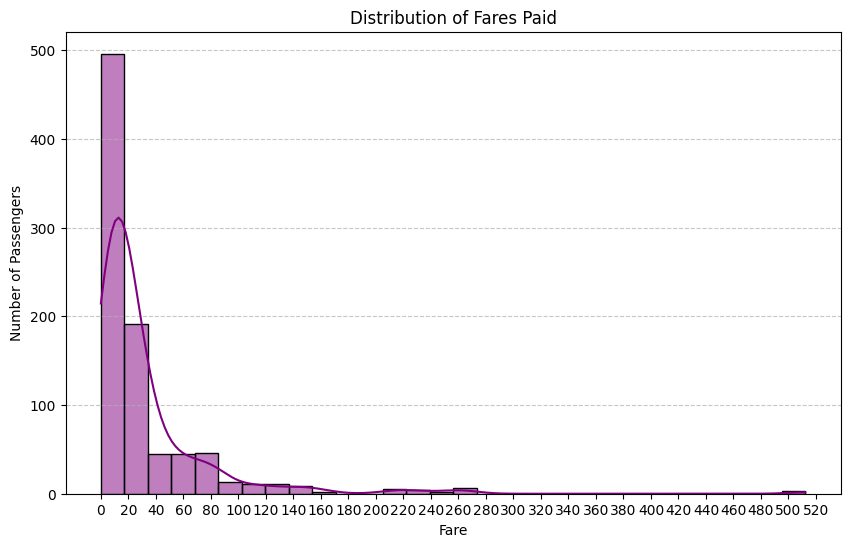

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the 'Fare' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df_titanic_cleaned, x='Fare', bins=30, kde=True, color='purple')
plt.title('Distribution of Fares Paid')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')

# Set x-axis intervals to 20
max_fare = df_titanic_cleaned['Fare'].max()
plt.xticks(range(0, int(max_fare) + 20, 20))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

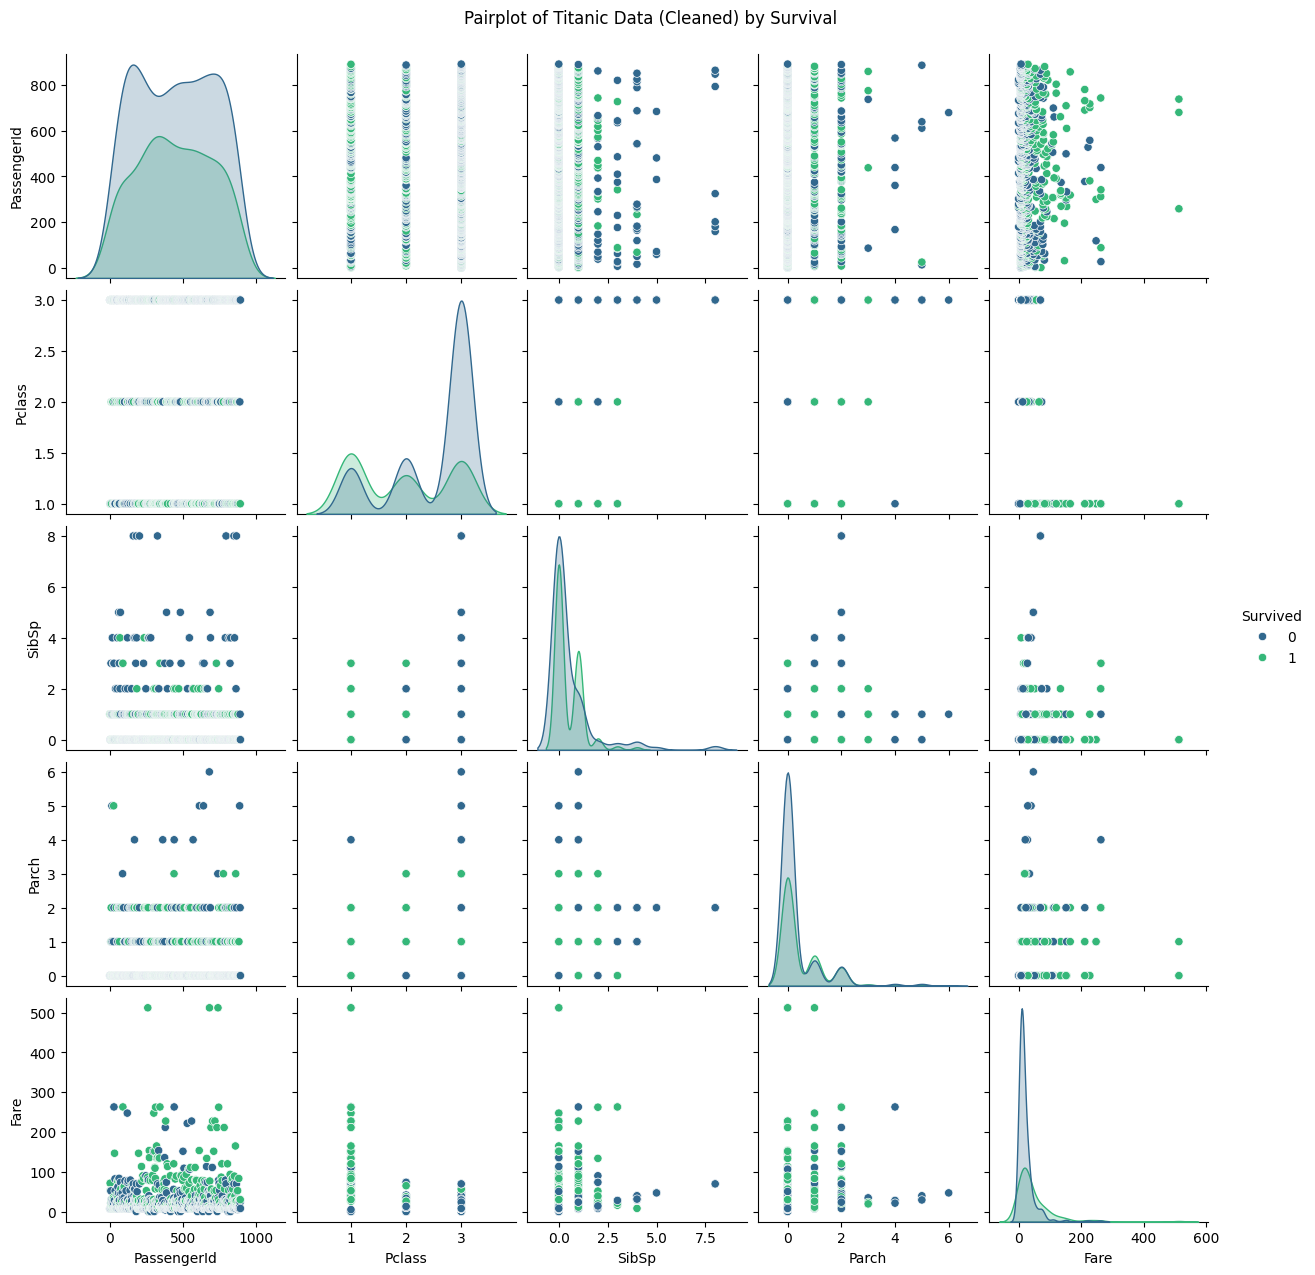

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot of the cleaned DataFrame
# By default, pairplot will only include numerical columns.
sns.pairplot(df_titanic_cleaned, hue='Survived', palette='viridis')
plt.suptitle('Pairplot of Titanic Data (Cleaned) by Survival', y=1.02) # Add a super title
plt.show()